<a href="https://colab.research.google.com/github/stsliwoski/CPSC392ParlettPelleriti/blob/master/HW1_SP22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm
from plotnine.stats import *
from plotnine.labels import ggtitle

%matplotlib inline

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict


#A.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")

In [ ]:
predictors = ["age", "boredom_rating",	"risk_propensity",	"height", "left_handed" ]
contin = ["age", "boredom_rating",	"risk_propensity",	"height"]

X = data[predictors]
y = data["reaction_time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

z = StandardScaler()

z.fit(X_train[contin])
X_train[contin] = z.transform(X_train[contin])
X_test[contin] = z.transform(X_test[contin])

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
residual_train = y_train - y_train_pred
true_vs_pred_train = pd.DataFrame({"Predicted Reaction Time": y_train_pred,
                             "Actual Reaction Time":y_train,
                             "Residual Reaction Time": residual_train})


In [ ]:
y_test_pred = model.predict(X_test)
residual_test = y_test - y_test_pred
true_vs_pred_test = pd.DataFrame({"Predicted Reaction Time": y_test_pred,
                                  "Actual Reaction Time": y_test,
                                  "Residual Reaction Time": residual_test})

In [ ]:
coefficents = pd.DataFrame({"Coef": model.coef_,
                            "Names": ["Age", "Boredom Rating",	"Risk Propensity",	"Height", "Left Handed"]})

In [ ]:
train_df = pd.DataFrame({"Age": X_train["age"], "Boredom Rating": X_train["boredom_rating"],
                         "Risk Propensity": X_train["risk_propensity"], 
                         "Height": X_train["height"],
                         "Left Handed": X_train["left_handed"], "Actual Reaction Time": y_train,
                         "Predicted Reaction Time" : y_train_pred})

#B.

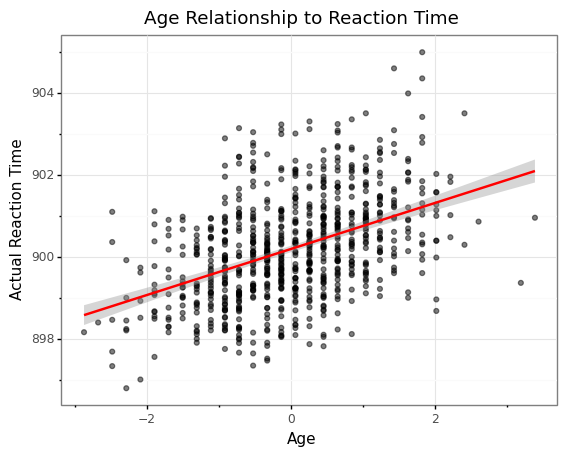

<ggplot: (8775011834845)>

In [ ]:
(ggplot(train_df, aes(x = "Age", y = "Actual Reaction Time"))+ theme_bw() + geom_point(alpha = .5)+
 stat_smooth(method = "lm", color = "Red")+
 theme(panel_grid_minor_x = element_blank())+
 theme(panel_grid_minor_x = element_blank())+
 ggtitle("Age Relationship to Reaction Time"))


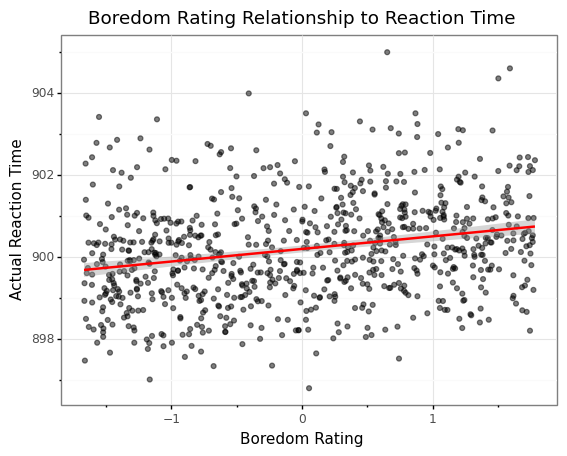

<ggplot: (8775007755745)>

In [ ]:
(ggplot(train_df, aes(x = "Boredom Rating", y = "Actual Reaction Time"))+ theme_bw() + geom_point(alpha = .5) +
 stat_smooth(method = "lm", color = "Red")+
 theme(panel_grid_minor_x = element_blank())+
 theme(panel_grid_minor_x = element_blank())+
 ggtitle("Boredom Rating Relationship to Reaction Time"))

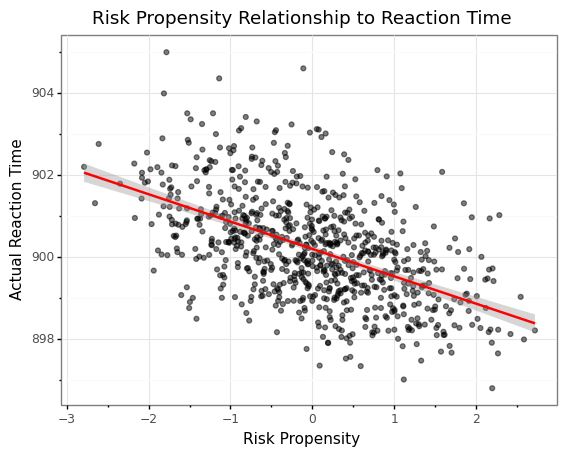

<ggplot: (8775009718129)>

In [ ]:
(ggplot(train_df, aes(x = "Risk Propensity", y = "Actual Reaction Time"))+ theme_bw() + geom_point(alpha = .5) +
 stat_smooth(method = "lm", color = "Red")+
 theme(panel_grid_minor_x = element_blank())+
 theme(panel_grid_minor_x = element_blank())+
 ggtitle("Risk Propensity Relationship to Reaction Time"))

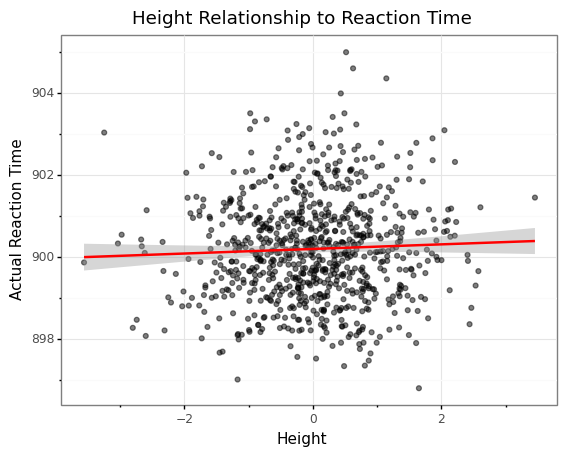

<ggplot: (8775011834717)>

In [ ]:
(ggplot(train_df, aes(x = "Height", y = "Actual Reaction Time"))+ theme_bw() + geom_point(alpha = .5) +
 stat_smooth(method = "lm", color = "Red")+ 
 theme(panel_grid_minor_x = element_blank())+
 theme(panel_grid_minor_x = element_blank())+
 ggtitle("Height Relationship to Reaction Time"))

B) Checking Linearity Assumptions

In each of the scatterplots I am looking to make sure the variables are not violating the assumptions of linearity: 1. The Relationship between X and Y are Linear, 2. The Variation of Residuals are Consistent Throughout the Graph (Homoscedastisity), 3. The Residuals are Normally Distributed. 

Age: There is a positive linear relationship between age and reaction time with a moderatly weak correlation. Although the data does not follow the trendline closely, the residuals variation is consistent and normally distributed, with the exception of a few outliers on the ends. 

Boredom Rating: There is a positive linear relationship between boredom rating and reaction time with a weak correlation. The residuals are consistent throught the graph but do not appear to be normally distributed, with a concentration at -1 and 1, opposed to 0. 

Risk Propensity: There is a negative linear relationship between risk propensity and reaction time with a moderatly strong correlation. Although the data does not follow the trendline closely, the residuals variation for the most part is consistent and normally distributed, with the exception of a few outliers. 

Height: There is a positive linear relationship between height and reaction time, however, the correlation is very weak, or possibly non-existant. We can tell by looking at how the slope of the line is almost flat (0), and how the data points don't follow the slope but are rather randomly distributed with a concentration in the center. I would say that height would not be a good variable to use in this model to predict reation based off this scatter plot.  


#C.

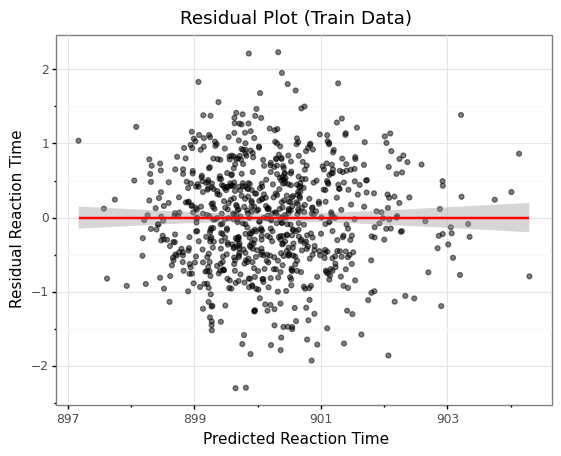

<ggplot: (8775009683273)>

In [ ]:
(ggplot(true_vs_pred_train, aes(x = "Predicted Reaction Time", y = "Residual Reaction Time")) + 
 theme_bw() + geom_point(alpha = .5) +
 stat_smooth(method = "lm", color = "Red")+
 theme(panel_grid_minor_x = element_blank())
 + ggtitle("Residual Plot (Train Data)"))

C) Homoscedasticity Assumption

The graph indicates that the model violates the assumption of homoscedasticity,by the inconsistent spread of errors on the plotted graph fanning out from left to right. The model is, for the most part, homoscedactic in predicting reactions times for 899 to 901 ms, with the exception of a few outliers - meaning that our model is better at predicting reaction time in between these times than it is above or below them. With that said, based on the graph, our model still looks linear with the residual plots concentated at 0.

#D.

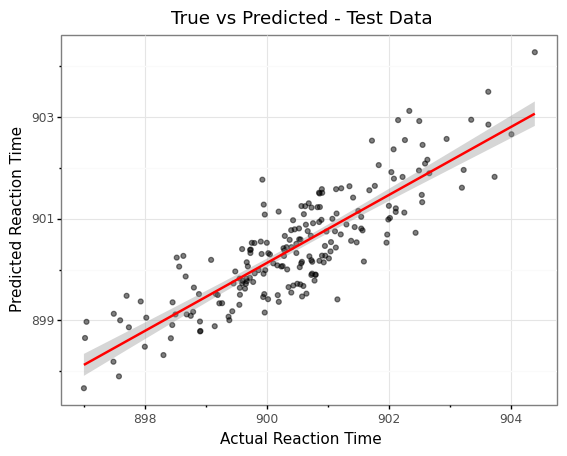

<ggplot: (8775007705097)>

In [ ]:
(ggplot(true_vs_pred_test, aes(x = "Actual Reaction Time", y = "Predicted Reaction Time")) + 
 theme_bw() + geom_point(alpha = .5) +
 stat_smooth(method = "lm", color = "Red")+
 theme(panel_grid_minor_x = element_blank())+
 ggtitle("True vs Predicted - Test Data"))

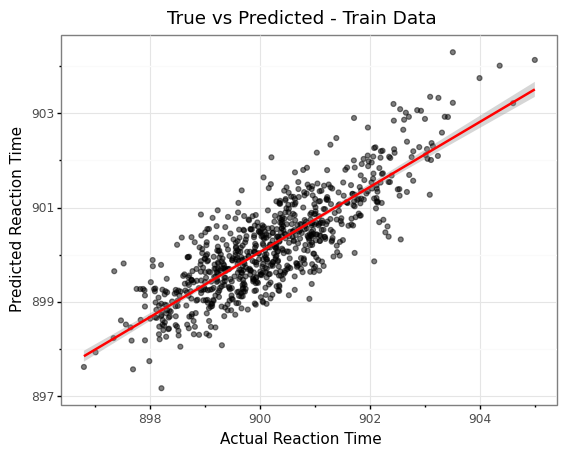

<ggplot: (8775007708613)>

In [ ]:
(ggplot(true_vs_pred_train, aes(x = "Actual Reaction Time", y = "Predicted Reaction Time")) + 
 theme_bw() + geom_point(alpha = .5) +
 stat_smooth(method = "lm", color = "Red")+
 theme(panel_grid_minor_x = element_blank())+
 ggtitle("True vs Predicted - Train Data"))

In [ ]:
print("The Mean Absolute Error For the Training Data is", mean_absolute_error(y_train, y_train_pred))

The Mean Absolute Error For the Training Data is 0.5695609385150087


In [ ]:
print("The Mean Absolute Error For the Testing Data is", mean_absolute_error(y_test, y_test_pred))

The Mean Absolute Error For the Testing Data is 0.5815512091106553


D) Mean Absolute Error (MAS)

The mean absolute error for the training data is .5696 and .5816 for the testing data. This is the average error for each regression or, in other words, the average of the difference between the predicted and actual reaction time. For this model the training data set performed slightly better than the testing data, due to its MSE being lower. 

In [ ]:
print("The R2 Score For the Training Data is",r2_score(y_train, y_train_pred))

The R2 Score For the Training Data is 0.6904641728527028


In [ ]:
print("The R2 Score For the Test Data is",r2_score(y_test, y_test_pred))

The R2 Score For the Test Data is 0.7195244912815522


D) R^2

The R^2 for the training data is .6905 and .7195 for the testing data. This is metric used to describe the variation between our indendent and dependent variable. For this model the test data set performed slightly better than the training set, accounting for 71.95% of the change in predicted reaction time. 

#E) Overfit or Underfit

I would say that the model is not overfit for two reasons - the first, is that the test data performed only slightly better than the training data, meaning that the model didn't have a significant variance to be deemed overfit. Second, is that the model is likely to have a high bias and be underfit, as the errors and wide spread of both true vs predicted graphs indicate that data sets do not perform well with the model; in other words, the model doesn't capture the relationship between our predictors and reaction time very well.  

#F.

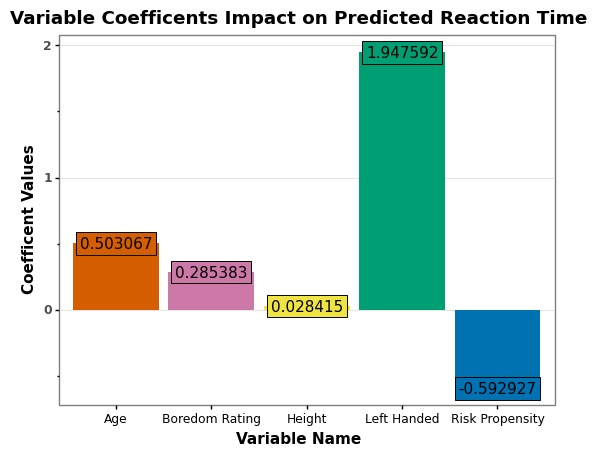

<ggplot: (8775007616481)>

In [ ]:
(ggplot(coefficents, aes(x = "Names", y = "Coef", fill = "Names" )) + geom_bar(stat = "identity")+
 ggtitle("Variable Coefficents Impact on Predicted Reaction Time")+
 labs(x = "Variable Name", y = "Coefficent Values", )+ theme_bw()+ 
 scale_fill_manual(["#d55e00","#cc79a7","#f0e442","#009e73", "#0072b2"])+
 geom_label(label = coefficents["Coef"].round(6), boxstyle = "square")+
 theme(panel_grid_major_x = element_blank(), 
       legend_position = "none",
       panel_grid_minor_y = element_blank(),
       axis_text_x = element_text(color = "black"),
       axis_text_y = element_text(face = "bold"),
       axis_title_x = element_text(face = "bold"),
       axis_title_y = element_text(face = "bold"),
       plot_title = element_text(face = "bold")))

F) Analysis of Coefficients

Age : For every one unit increase in age, the predicted reaction time inceases by .503067 units. Age has the second highest positive impact on predicted reation time and the third highest impact out of all variables on predicted reaction time. 

Boredom Rating : For every one unit increase in boredom rating, the predicted reaction time increases by .285383 units. Boredom Rating has the third highest postive impact on predicted reaction time. 

Height : For every one unit increase in height, the predicted reation time increases by .028415 units. Height has the least impact on predicted reaction time out of all variables

Left Handed : If the data point is for a left handed person, the predicted reaction time increases by 1.947592 units. Left Handed has the highest impact on predicted reaction time out of all the variables. 


Risk Propensity : For every one unit increase in risk propensity, the predicted reation time decreases by .592927 units. Risk Propensity is the only negative variable and has the second highest impact on predicted reaction time out of all the variables. 